In [2]:
from __future__ import print_function, division
import os
import torch
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

%matplotlib inline

# read input data


In [3]:
# paths
TRAIN_PATH = '../input/stage1_train/'
TEST_PATH = '../input/stage1_test/'

# parameters
W, H, CH = 128, 128, 3

In [48]:
# define dataset class for bowl dataset
class BowlDataset(Dataset):
    """2018 DS BOWL dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images and masks.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.ids = next(os.walk(root_dir))[1]
        self.samples = {}

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        if idx in self.samples:
            sample = self.samples[idx]
        else:
            img_name = os.path.join(self.root_dir, self.ids[idx], 'images', self.ids[idx] + '.png')
            masks_folder = os.path.join(self.root_dir, self.ids[idx], 'masks')
            image = io.imread(img_name)
            # read masks
            masks = []
            mask_combined = np.zeros((image.shape[0], image.shape[1]), dtype=np.int)
            for f in os.listdir(masks_folder):
                mask = io.imread(os.path.join(masks_folder, f))
                mask_combined = np.bitwise_or(mask_combined, mask)
                masks.append(mask)

            sample = {'image': image, 'masks': masks, 'mask_combined': mask_combined}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [49]:
train_data = BowlDataset(TRAIN_PATH)
test_data = BowlDataset(TEST_PATH)
print("Training Set: ", len(train_data), "samples")
print("Test Set: ", len(test_data), "samples")

Training Set:  670 samples
Test Set:  65 samples


# Show some images

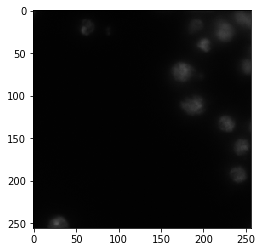

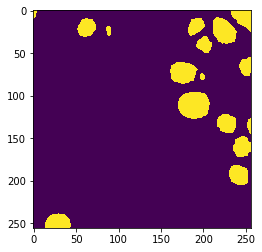

In [52]:
plt.imshow(train_data[0]['image'])
#for mask in train_data[0]['masks']:
#    plt.figure()
#    plt.imshow(mask)
plt.figure()
plt.imshow(train_data[0]['mask_combined'])

# combined mask

In [47]:
mask_combined

NameError: name 'mask_combined' is not defined

In [ ]:
np.